<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > UniGe Cosmo Machine Learning </h1> 
<h2 style = "text-align:center"> Tutorial 0 - Intro to Pandas </h2> 
<h3 style = "text-align:center"> 21.02.2020 - Michele </h3> 
<hr style="border-width:2px;border-color:#75DFC1">


> This tutotial priovides an introdiction to **pandas**

> In this excercise, we will **explore the increase in publications on the arXiv that deal with Machine Learning between 2007 and 2018**. The goal will be to show the increment in such publications over the last 10 years with a focus on physics. 
( This exercise actually reproduces the plots of the paper *"The (non)-neutrality of science and algorithms: Machine Learning between fundamental physics and society"*. (Struggling to put it on the arXiv in English, published <a href=https://thelabsquarterly.files.wordpress.com/2019/04/2018.4-the-labs-quarterly-5.-aniello-lampo-michele-mancarella-angelo-piga-1.pdf > in Italian </a>  :-/ ) )

> A notebook with the full analysis and a script to obtain the data are available at https://github.com/Mik3M4n/ML_physics_society

> Why pandas? pandas is thought so as to make easy the handling of "largish" datasets (for really LARGE datasets, use PySpark ! ). It is straightforward, proveides good viz tools, and many one-line commands to perform the most common operations on datasets (typically: filter, sort, group, apply functions, get derived features)

> Summary:
* Load and describe data: .read_csv, .shape, .sort
* Clean data and extract useful information: check for NA and duplicates, .apply , ...
* Group and select data 

> Goals:
* Learn how to load, clean, explore, prepare your data


> Packages and resources:
* **pandas** (surprise): see the <a href = http://pandas.pydata.org/pandas-docs/stable/>documentation</a> 

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center">  Data and problem </h2> 
<hr style="border-width:2px;border-color:#75DFC1">



> Data are obtained by three different queries on the arXiv: 
    * with keyword "Machine Learning" in title/abstract
    * with keyword "Deep Learning" in title/abstract
    * with keyword "Neural Networks" in title/abstract

The corespondig data are stored in the files arxiv_ML.csv, arxiv_DL.csv, arxiv_NN.csv in the Dropbox folder. Download them in a folder called data/ inside your local git folder

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Load, read, describe data </h2> 
<hr style="border-width:2px;border-color:#75DFC1">


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob

import matplotlib.pyplot as plt
%matplotlib inline
#set ggplot style
plt.style.use('ggplot')

> The fundamental object in pandas is a *dataframe*. It's a two-dimensional, size-mutable object that can contain any type of data. 
See https://pandas.pydata.org/pandas-docs/stable/reference/frame.html for a list of methods

> The function <a href = "https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html?highlight=read_csv#pandas.read_csv"> **read_csv** </a> loads a csv file in a pandas dataframe

In [27]:
df_ML = pd.read_csv('data/arxiv_ML.csv')
df_DL = pd.read_csv('data/arxiv_DL.csv')
df_NN = pd.read_csv('data/arxiv_NN.csv')

# I put all the df in a list and will then work on this list. 
# This make easy to extend the analysus, e.g. if we want to add other queries
df_all = [df_ML, df_NN, df_DL]
df_names = ['Machine Learning', 'Neural Networks', 'Deep Learning']

<span style="color:#09b038; text-decoration : underline"> Exercise : </span><br> 
* Can you find any *bad* python practise in the above cell ?

#### Useful methods

The method .head(n_lines) displays the first n_lines. Good to have a glace at your data

In [28]:
df_ML.head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract
0,1812.06055v1,2018-12-14T18:02:42Z,Transfer learning to model inertial confinemen...,"K. D. Humbird,J. L. Peterson,R. G. McClarren",http://arxiv.org/abs/1812.06055v1,None,None,cs.LG,"['cs.LG', 'stat.ML']",Inertial confinement fusion (ICF) experiments ...
1,1812.06034v1,2018-12-14T17:15:24Z,Scalable Privacy-Compliant Virality Prediction...,"Damian Konrad Kowalczyk,Jan Larsen",http://arxiv.org/abs/1812.06034v1,None,Presented at AAAI-19 W1: Affective Content Ana...,cs.SI,['cs.SI'],The digital town hall of Twitter becomes a pre...


The method .shape returns dimension of the dataframe (as in numpy) in the form (n_rows, n_columns)

In [29]:
# Check how many data we have: the method .shape returns dimension of the dataframe (as in numpy)

for i in range(len(df_all)):
    print(df_names[i]+' - N. of papers: %s' %df_all[i].shape[0] )
print('Total papers: %s' %np.sum([df.shape[0] for df in df_all]))

Machine Learning - N. of papers: 11637
Neural Networks - N. of papers: 38044
Deep Learning - N. of papers: 7716
Total papers: 57397


In [30]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11637 entries, 0 to 11636
Data columns (total 10 columns):
ID             11637 non-null object
date           11637 non-null object
title          11637 non-null object
author         11637 non-null object
link           11637 non-null object
journal        11637 non-null object
comments       11637 non-null object
primary_cat    11637 non-null object
all_cat        11637 non-null object
abstract       11637 non-null object
dtypes: object(10)
memory usage: 909.3+ KB


In [31]:
df_ML.describe()

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract
count,11637,11637,11637,11637,11637,11637,11637,11637,11637,11637
unique,10009,9992,9993,9607,10009,1342,4908,135,3026,10002
top,1701.03220v1,2012-06-27T19:59:59Z,Robust Machine Learning Applied to Terascale A...,Peter D. Turney,http://arxiv.org/abs/1612.08914v1,None,None,cs.LG,"['cs.LG', 'stat.ML']","Designing and implementing efficient, provably..."
freq,2,8,4,9,2,10012,4595,2214,597,4


Note that there are less unique IDs than points! Wee need to check for duplicates

#### Indexing

> Indexing on a dataframe is a generalisation of that of a list, but more general: a column or variable is generally designated by its name (not only number). Lines generally do not carry a name and are identified by an integer.

>* To extract one or more columns, you only need to put between brackets the list of column names to extract.<br>
> <span style="color:#09b038; text-decoration : underline"> Example : </span><br> 
```python
  df_ML[["title","author"]] # extracts columns title and author
```

>* To extract one or more lines, we use method <a href = "https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html">loc</a>.<br>
> <span style="color:#09b038; text-decoration : underline"> Example : </span><br> 
```python
  df_ML.loc[[4,9]] #extracts 5th et 10th line of df_ML (reminder: indices start at 0!)
```

>* Symbol '**<span style="color:#A93226">:</span>**' is used for a range of values.<br>
> <span style="color:#09b038; text-decoration : underline"> Example :</span><br> 
```python
  df_ML.loc[0:9,"abstract"] #to extract first 10 abstracts
```


In how many primary cathegories does the term 'Deep Learning' appear ? 
Use the method .value_count()

In [32]:
df_DL.primary_cat.unique()

array(['cs.CV', 'cs.LG', 'cs.DC', 'astro-ph.CO', 'cs.NI', 'cs.SE',
       'math.OC', 'cs.CR', 'cs.IT', 'stat.ML', 'quant-ph', 'eess.SP',
       'physics.comp-ph', 'cs.AI', 'math.PR', 'cs.CL', 'cs.CY', 'cs.NE',
       'cs.RO', 'astro-ph.IM', 'physics.med-ph', 'stat.AP', 'cs.IR',
       'eess.AS', 'math.NA', 'cs.PL', 'physics.data-an', 'physics.optics',
       'cs.SY', 'cs.PF', 'cs.SI', 'q-bio.BM', 'cs.SD', 'hep-ex',
       'q-bio.QM', 'cs.HC', 'q-fin.CP', 'physics.geo-ph', 'cs.MS',
       'physics.flu-dyn', 'q-bio.GN', 'cs.MM', 'hep-th', 'cs.GR',
       'astro-ph.SR', 'astro-ph.EP', 'q-bio.NC', 'cs.CE', 'astro-ph.GA',
       'eess.IV', 'cond-mat.mtrl-sci', 'cond-mat.str-el', 'cond-mat.soft',
       'physics.ins-det', 'cond-mat.dis-nn', 'physics.soc-ph', 'q-fin.ST',
       'cs.DB', 'econ.EM', 'math.CO', 'math.AP', 'physics.chem-ph',
       'cond-mat.quant-gas', 'physics.app-ph', 'nlin.CG', 'q-bio.TO',
       'cs.MA', 'hep-ph', 'physics.ao-ph', 'cs.OH', 'math.DS', 'gr-qc',
       'cs.CG',

When was the first paper with "Deep Learning" published ? Use .sort()

In [33]:
df_DL.sort_values(by='date').head(1)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract
5599,0809.5087v1,2008-09-29T23:00:22Z,Hybrid Neural Network Architecture for On-Line...,"Yuhua Chen,Subhash Kak,Lei Wang",http://arxiv.org/abs/0809.5087v1,None,"19 pages, 16 figures",cs.NE,['cs.NE'],Approaches to machine intelligence based on br...


<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Clean data </h2> 
<hr style="border-width:2px;border-color:#75DFC1">


#### Missing values

> It is frequent to have missing values. We will not directly use all the following methods here but it is good to know them.
* <a href = "https://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html">**`isnull()`**</a> detects any missing values in an input table. It returns an output table with the input table dimensions. Output value (i, j) is either `True`, if input value (i,j) is missing or `False` otherwise.  
To know whether **at least one** element is missing in the dataset, or not:
```python
  pd.isnull(dataset).any()
```

>* <a href ="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html">**fillna**</a> replaces missing values of a dataframe with specified value.

> <span style="color:#09b038; text-decoration : underline"> Example :</span><br>  
```python
  df_DL.fillna(0) # replace all missing values with 0
```

>*  <a href = "http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html"> **dropna** </a> suppresses lines and columns with missing values.

> <span style="color:#09b038; text-decoration : underline"> Example :</span><br> 
```python
  df_DL.dropna(how = 'any') # suppresses lines with at least one NA
  df_DL.dropna(how = 'all') # suppresses completely empty lines 
  df_DL.dropna(axis = 1, how = 'all') # suppresses empty columns (by default axis=0)
```

> *   <a href = "http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html"> **drop_duplicates** </a> suppresses duplicates.

> We saw that we likely have duplicates in our dataframes. (Likely due to the fact that my script fot querying the arXiv is not efficient :-/ )

> A paper on the arXiv is identified by a unique ID. However, we know that also replacements exist, which are labeled by v1, v2, etc.  So we want to get rid of these as well

> The function strip_id separates the arXiv id from the suppix v1, v2, etc and returns main ID only

In [34]:
def strip_id(my_id):
    sep='v'
    return my_id.split(sep, 1)[0]

strip_id('1809.02601v4')

'1809.02601'

> Excercise: 
    1 -  apply the funciton strip_id to ALL the columns of the dataframes to obtain the arXiv ID.
    2 - find how many duplicates IDs there are
    3 -  get rid of them


In [36]:
# Solution 1

for df in df_all:
    df['ID'] = df.ID.apply(lambda x: strip_id(x))

In [37]:
# Solution 2

for df in df_all:
    print(df.duplicated('ID').sum())

1628
19143
1505


In [39]:
# Solution 3

for i,df in enumerate(df_all):
    df_all[i] = df_all[i].drop_duplicates('ID')
    print(df_names[i]+' - N. of papers: %s' %df_all[i].shape[0] )

print('Total papers: %s' %np.sum([df.shape[0] for df in df_all]))


Machine Learning - N. of papers: 10009
Neural Networks - N. of papers: 18901
Deep Learning - N. of papers: 6211
Total papers: 35121


#### Excercises: extract other features

> <span style="color:#09b038; text-decoration : underline"> Excercise :</span><br>  

* We are interested in the publication year. The column **date** provides the date and time of publication. 
Extract the year and store it in a new column 'year'. This variable should be an integer. The format of the date is as follows:


In [49]:
ex_date = df_NN['date'].iloc[1]
ex_date

'2016-09-19T11:34:24Z'

> * Hint: define a function that isolates the year as done for the arxiv ID, then use the method .apply to apply it to the full dataframe
* Bonus: do this in one line of code ! (hint: use the lambda function)

In [ ]:
# Put your code here....




In [56]:
# Solution:
for df in df_all:
    df['year'] = df['date'].apply(lambda x: int(x.split('-')[0]))

/Users/Michi/miniconda3/envs/snakes/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


> <span style="color:#09b038; text-decoration : underline"> Excercise :</span><br>  
* The field 'primary cathegory' contains unfortunately the arXiv sub-category and not the mai one. This gives a lot of different cases, as we saw by checking the different cathegories where the term 'Deep Learning' appears. We want to simplify and reduce to the main cathegory, which is one of the following: Physics, maths, computer science, quantitative biology, quant. finance, statistics, electrical engineering and ssystem science, economics, computation and language

* (Boring) Write a function map_column(cat) that takes as input a string givinf the subcathegory as in the field 'primary_cat', and returns a string with the main arXiv cathegory.
* Apply the aboev function to the dataframes and store the result in a new column called 'arxiv_category'

In [51]:
def map_column(cat):
    
    if 'ph' in cat or 'cond-mat' in cat or 'hep' in cat or 'nlin' in cat or 'nucl' in cat or 'gr-qc' in cat:
        return 'phys'
    elif 'cs.' in cat and not 'physics' in cat:
        return 'cs'
    elif 'math' in cat and not 'ph' in cat:
        return 'math'
    elif 'q-bio' in cat:
        return 'q-bio'
    elif 'q-fin' in cat:
        return 'q-fin'
    elif 'stat' in cat:
        return 'stat'
    elif 'eess' in cat:
        return 'eess'
    elif 'econ' in cat:
        return 'econ'
    elif 'cmp-lg' in cat:
        return 'cmp-lg'
    else:
        return 'None'


In [52]:
for df in df_all:
    df['arxiv_category'] = df['primary_cat'].apply(lambda x: map_column(x))

/Users/Michi/miniconda3/envs/snakes/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:

df_all[1].head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,year
0,1609.05695,2016-09-19T12:43:32Z,A scalable convolutional neural network for ta...,"Mengnan Shi,Fei Qin,Qixiang Ye,Zhenjun Han,Jia...",http://arxiv.org/abs/1609.05695v2,None,None,cs.CV,['cs.CV'],"In this paper, we explore the redundancy in co...",cs,2016
1,1609.05672,2016-09-19T11:34:24Z,Multi-Residual Networks: Improving the Speed a...,"Masoud Abdi,Saeid Nahavandi",http://arxiv.org/abs/1609.05672v4,None,This work has been submitted to the IEEE for p...,cs.CV,['cs.CV'],"In this article, we take one step toward under...",cs,2016


#### Mapping


* Among all the cathegories, we are interested in Physics, Computer Science, Statistics. The others may be grouped together.
To do this, we can use the method  <a href ="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html">**map**</a>


In [60]:
cat_map = {'phys':'Physics', 'cs':'Computer Science', 'stat': 'Statistics',
          'math': 'Other', 'q-bio':'Other', 'q-fin':'Other',
           'eess': 'Other', 'econ':'Other', 'cmp-lg': 'Other','None':'Other'}

for df in df_all:
    df['arxiv_category_grouped'] = df['arxiv_category'].map(cat_map)


/Users/Michi/miniconda3/envs/snakes/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df_all[2].head(2)

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,year,arxiv_category_grouped
0,1812.06061,2018-12-14T18:20:39Z,Automatic quantification of the LV function an...,"Ariel H. Curiale,Flavio D. Colavecchia,German ...",http://arxiv.org/abs/1812.06061v1,None,Accepted in Computer Methods and Programs in B...,cs.CV,['cs.CV'],Objective: This paper proposes a novel approac...,cs,2018,Computer Science
1,1812.06023,2018-12-14T16:58:02Z,Advanced Super-Resolution using Lossless Pooli...,"Farzad Toutounchi,Ebroul Izquierdo",http://arxiv.org/abs/1812.06023v1,None,Accepted paper: 2019 IEEE Winter Conference on...,cs.CV,['cs.CV'],"In this paper, we present a novel deep learnin...",cs,2018,Computer Science


<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Filter and group data </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

In this section we want to count number of papers with Machine Learning, Deep Learning, or Neural Networks in title or abstract in the last 10 years. To do so, we have to group and filter the results by year. 

At the end, we will reproduce (up to normalization) Figure 1 in the paper. 

Let's start by extracting a list of (sorted) years from our data

In [63]:
yrs = np.sort(np.array([int(y) for y in np.squeeze(df_all[1][df_all[1]['year']>=2005]['year'].unique()[::-1])]))
yrs

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018])

#### Filtering


> Filtering consists in selecting a subset of rows in the dataframe, based on some criteria.  
To filter on several conditions, you can use several logical operators:  & (and), | (or), ~ (not). <br>

<span style="color:#09b038; text-decoration : underline"> Example : </span><br> 
```python
subset = df_all[1][df_all[1]['year']<=2010 & df_all[1]['year']>=2008]
# Filtering 'Neural Networks' papers between 2008 and 2010
```

#### Group

We want to know how many papers were published each year. We can use the method <a href ="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby">**groupby**</a> which allows to group a dataframe according to values of a aprticular column, and then apply any other method to that.

In our case, we can group by 'year' and then apply the method  <a href ="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.count.html?highlight=count#pandas.core.groupby.DataFrameGroupBy.count">**count**</a> to count papers per year.

<span style="color:#09b038; text-decoration : underline"> Example : </span><br>
count  'Deep learning' papers per year starting from 2005

In [73]:
yr_count = df_all[2][df_all[2]['year']>=2005].groupby(['year']).count().iloc[:, 0]
yr_count

year
2008       1
2010       1
2011       3
2012      10
2013      49
2014      92
2015     310
2016     688
2017    1767
2018    3290
Name: ID, dtype: int64

<span style="color:#09b038; text-decoration : underline"> Exercise : </span><br>

! We don't have any papers before 2008, and none in 2009 as well. To produce a meaningful plot, we hav to **pad** this array inserting the missing values

In [75]:
def pad_count(yr_count, yrs):
    for yr in yrs:
        if yr not in yr_count.keys(): 
            yr_count = yr_count.append(pd.Series([0], index=[yr]))
    return yr_count.sort_index( ascending=True)

pad_count(yr_count, yrs)

2005       0
2006       0
2007       0
2008       1
2009       0
2010       1
2011       3
2012      10
2013      49
2014      92
2015     310
2016     688
2017    1767
2018    3290
dtype: int64

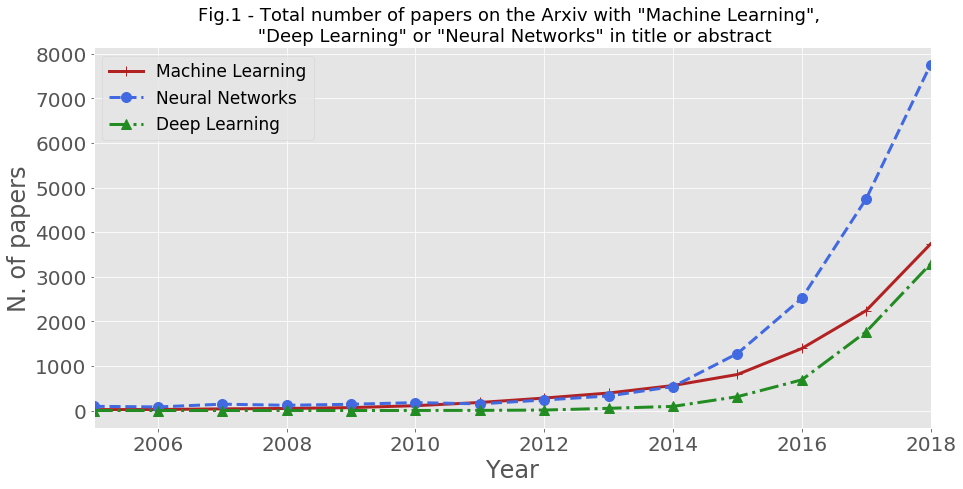

In [81]:
###### LINE STYLES AND COLORS

color_list =['firebrick', 'royalblue', 'forestgreen','darkorange', 'blueviolet']
l_styles = ['-','--', '-.', '-..']
styles = ['-'+c for c in '+']+ ['--'+c for c in 'o']+\
['-.'+c for c in '^']+['-'+c for c in 's']+[':'+c for c in 'p']

######

min_yr=2005

fig_all, ax_all = plt.subplots(figsize=(15,7))

papers_percentage = []

for i,df in enumerate(df_all):
    arr = df[df['year']>=min_yr].groupby(['year']).count().iloc[:, 0]
    arr = pad_count(arr, yrs).values
    papers_percentage.append(arr)

    df_plot = pd.DataFrame(
              papers_percentage[i], index=yrs, columns=[df_names[i]]).sort_index( ascending=True)
    df_plot.plot( ax=ax_all, legend=False,
                                            label=df_names[i],
                                           style = styles[i], color=color_list[i],
                                                         linewidth=3, markersize=10)
ax_all.legend(loc=0, prop={'size': 17});
ax_all.set_title('Fig.1 - Total number of papers on the Arxiv with "Machine Learning", \n "Deep Learning" or "Neural Networks" in title or abstract',\
                fontsize=18);
ax_all.set_xlabel('Year', fontsize=24);
ax_all.set_ylabel('N. of papers', fontsize=24);
ax_all.tick_params(labelsize=20)
ax_all.set_xlim([2005,2018]);

In [ ]:

If time:
Keep only categories that had in increment of more than 5 in the last 10 years and that have at least 10 papers in 2018

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Excercises </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

<span style="color:#09b038; text-decoration : underline"> Exercise : </span><br>
* Reproduce Figure 2 in the paper (with total number of papers on the y axis). This is a plot of number of papers with either 'Machine Learning', 'Neural Networks' or 'Deep Learning' in title or abstract vs year, divided by the following arxiv cathegories: Physics, Computer Science, Statistics, Other
> Hints and steps:
* Now we are not interested any more in dividing the dataframes by keyword, hence we can concatenate them together. 
Create a datadrame called 'df_full' which is the concatenation of the three dataframes in df_all. Use the method 
<a href ="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat">**concat**</a>. Verify that it has shape (35121, 13)
* To simplify your life, we have already created a column that labels the papers by one of the following cathegories: Physics, Computer Science, Statistics, Other. Remember? (see  section Mapping). This column is called 'arxiv_category_grouped'. Create a dataframe called *df_grouped* that groups papers published after 2005 by the values of 'year' and 'arxiv_category_grouped'. (Hint: adapt what we did to create 'yr_count'. Append the method .unstack() to the result to visualise better). Check that there are no missing values and if so fill them with zeros
* Create a dataframe called 'df_plot_2' that contains the number of papers for each cathegory in Physics, Computer Science, Statistics, Other, and has the year as an index (if you are unsure about indexing, consult the pandas dataframe docuentation and check index). Set the column names to ['Computer Science', 'Other', 'Statistics', 'Physics']
* plot df_plot_2 with the same style as Figure 1 above


<span style="color:#09b038; text-decoration : underline"> Solution : </span><br>

In [82]:
df_full = pd.concat(df_all, axis=0)
df_grouped = df_full[df_full['year']>=2005].groupby(['year','arxiv_category_grouped']).count()['ID'].\
                                                    unstack().fillna(0)


In [84]:
cs_vals = df_grouped['Computer Science'].values
ph_vals = df_grouped['Physics'].values
stat_vals=df_grouped['Statistics'].values
other_vals=df_grouped['Other'].values

df_plot_2 = pd.DataFrame([ cs_vals,other_vals, stat_vals, ph_vals]).fillna(0).transpose()
df_plot_2.index=yrs
df_plot_2.columns=['Computer Science', 'Other', 'Statistics', 'Physics']
df_plot_2

,Computer Science,Other,Statistics,Physics
2005,39.0,22.0,0.0,53.0
2006,27.0,24.0,0.0,51.0
2007,60.0,32.0,9.0,78.0
2008,51.0,23.0,16.0,74.0
2009,83.0,23.0,19.0,80.0
2010,164.0,31.0,18.0,73.0
2011,174.0,42.0,30.0,86.0
2012,326.0,57.0,48.0,94.0
2013,501.0,89.0,72.0,105.0
2014,761.0,119.0,145.0,164.0


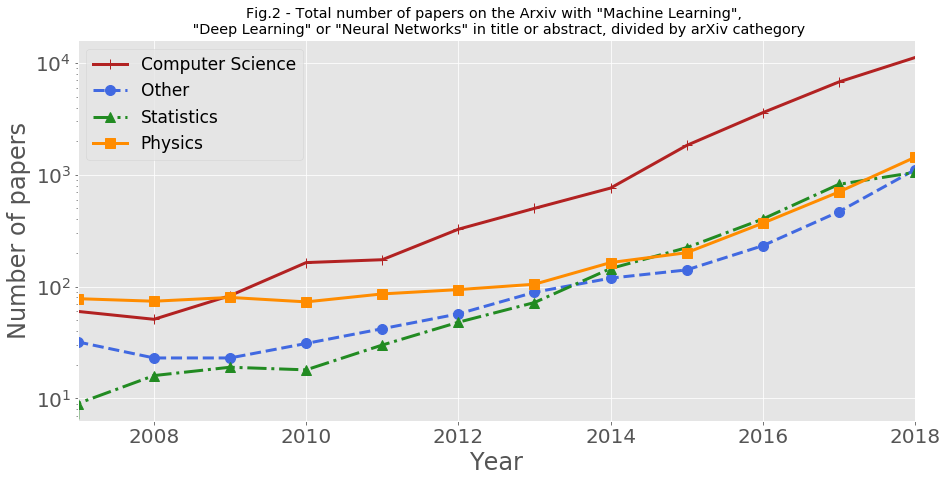

In [88]:
fig_all_cat, ax_all_cat = plt.subplots(figsize=(15,7))

df_plot_2.\
            plot(logy=True, ax=ax_all_cat,
            #label=df_names[i],
            style = styles, color=color_list,
            linewidth=3, markersize=10
            )
ax_all_cat.legend(loc=0, prop={'size': 17});

ax_all_cat.set_xlabel('Year', fontsize=24);
ax_all_cat.set_ylabel('Number of papers', fontsize=24);
ax_all_cat.set_xlim([2007,2018]);
ax_all_cat.tick_params(labelsize=20)
ax_all_cat.set_title('Fig.2 - Total number of papers on the Arxiv with "Machine Learning", \n "Deep Learning" or "Neural Networks" in title or abstract, divided by arXiv cathegory');


<span style="color:#09b038; text-decoration : underline"> Exercise : </span><br>
* Reproduce Figure 3 in the paper (with total number of papers on the y axis). 
This is a plot of number of papers with either 'Machine Learning', 'Neural Networks' or 'Deep Learning' in title or abstract vs year in papers in physics only, divided by the following sub-cathegories: 'astro-ph', 'cond-mat', 'quant-ph','hep-th', 'Other'

* Solution: check the notebook at 

<span style="color:#09b038; text-decoration : underline"> Exercise : </span><br>
* Do the same but only for sub-cathegories in astro-ph


<span style="color:#09b038; text-decoration : underline"> Exercise : </span><br>
* How many papers  with either 'Machine Learning', 'Neural Networks' or 'Deep Learning' in title or abstract has ever been published in Nature? 

In [95]:
df_full[df_full.journal.apply(lambda x: "Nature" in x)==True].shape[0]

42

* How many papers  with either 'Machine Learning', 'Neural Networks' or 'Deep Learning' in title or abstract has ever been published in PRL? 

In [111]:
df_full[df_full.journal.apply(lambda x: "Phys. Rev. Lett." in x)==True].shape

(77, 13)

<span style="color:#09b038; text-decoration : underline"> Exercise : </span><br>
* Find if anyone in this room has ever published a ML-related paper. (If so, ask them to present it)

In [105]:
df_full[df_full.author.apply(lambda x: "Bonvin" in x)==True]

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,year,arxiv_category_grouped


In [106]:
df_full[df_full.author.apply(lambda x: "Lombriser" in x)==True]

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,year,arxiv_category_grouped


In [104]:
df_full[df_full.author.apply(lambda x: "M. Maggiore" in x)==True]

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,year,arxiv_category_grouped


In [107]:
df_full[df_full.author.apply(lambda x: "Durrer" in x)==True]

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,year,arxiv_category_grouped


In [102]:
df_full[df_full.author.apply(lambda x: "M. Kunz" in x)==True]

,ID,date,title,author,link,journal,comments,primary_cat,all_cat,abstract,arxiv_category,year,arxiv_category_grouped
3525,1801.04140,2018-01-12T11:57:22Z,Cosmic String Detection with Tree-Based Machin...,"A. Vafaei Sadr,M. Farhang,S. M. S. Movahed,B. ...",http://arxiv.org/abs/1801.04140v1,Monthly Notices of the Royal Astronomical Soci...,"7 pages, 3 figures, 2 tables, Comments are wel...",astro-ph.CO,"['astro-ph.CO', 'astro-ph.IM', 'physics.data-a...",We explore the use of random forest and gradie...,phys,2018,Physics
17694,1502.00543,2015-02-02T16:45:34Z,Planck 2013 results. XXIX. The Planck catalogu...,"Planck Collaboration,P. A. R. Ade,N. Aghanim,C...",http://arxiv.org/abs/1502.00543v1,None,Submitted to A&A,astro-ph.CO,['astro-ph.CO'],We update the all-sky Planck catalogue of 1227...,phys,2015,Physics
